<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imputation**

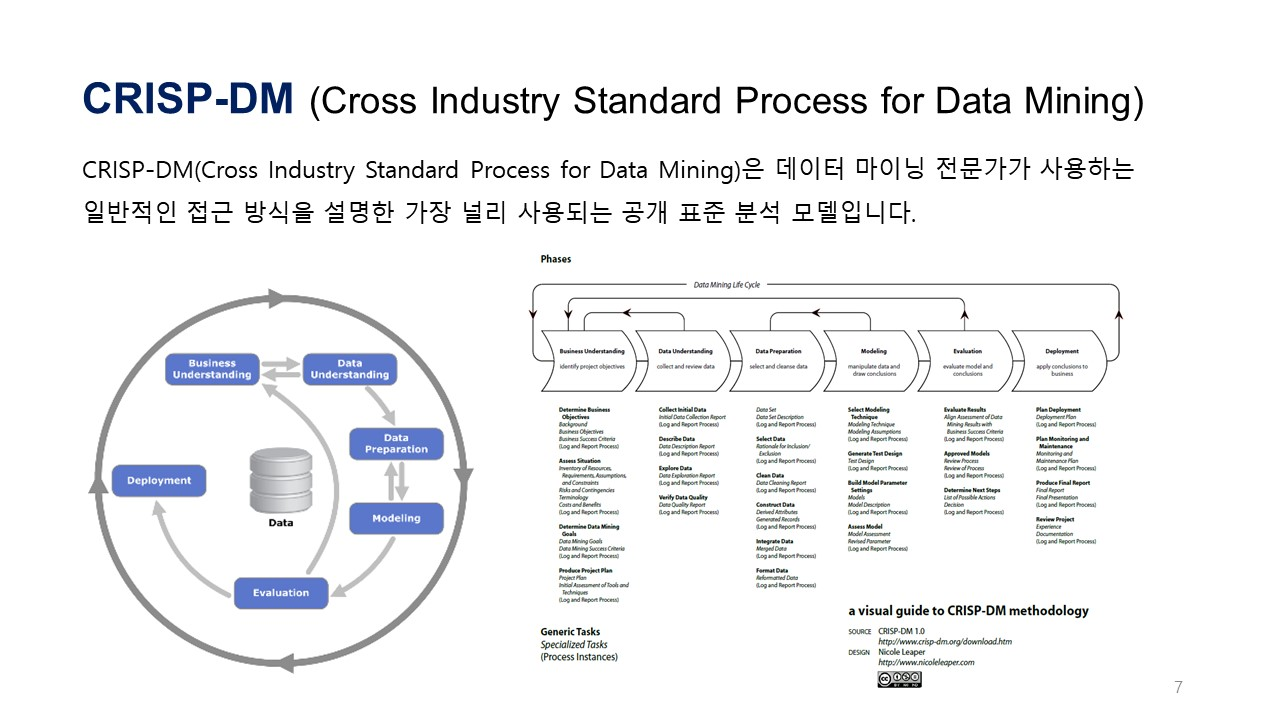

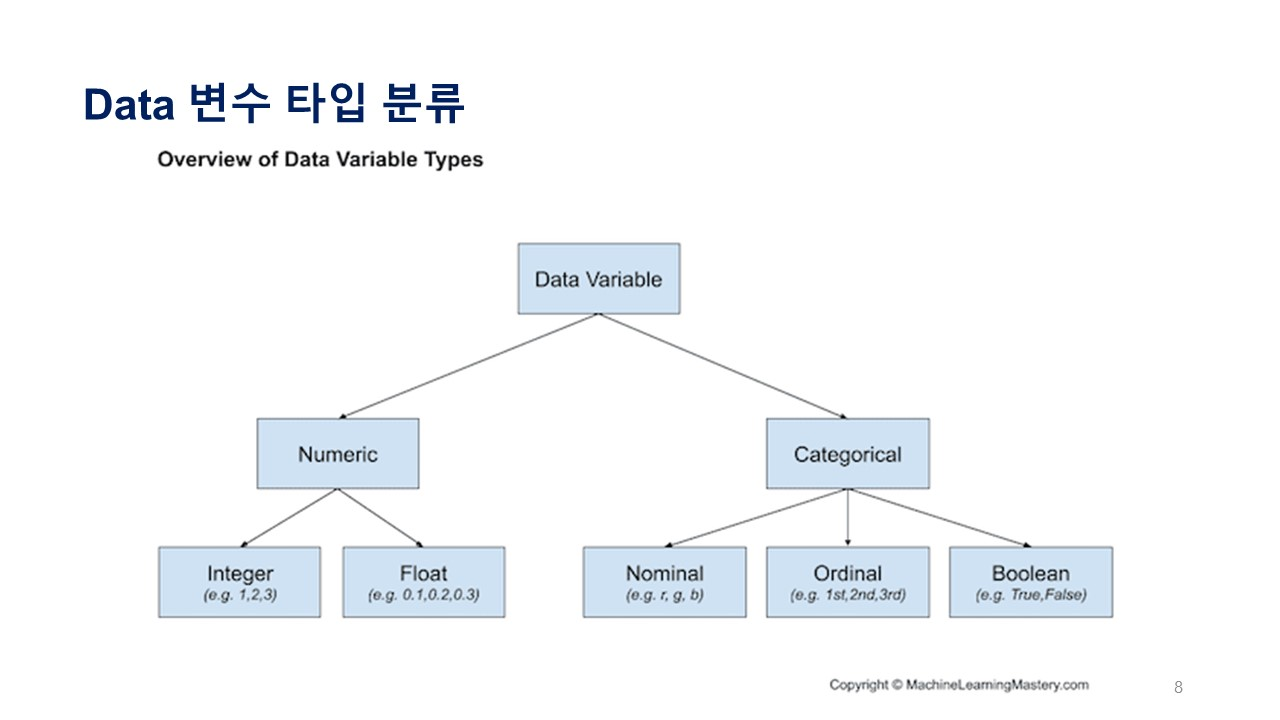

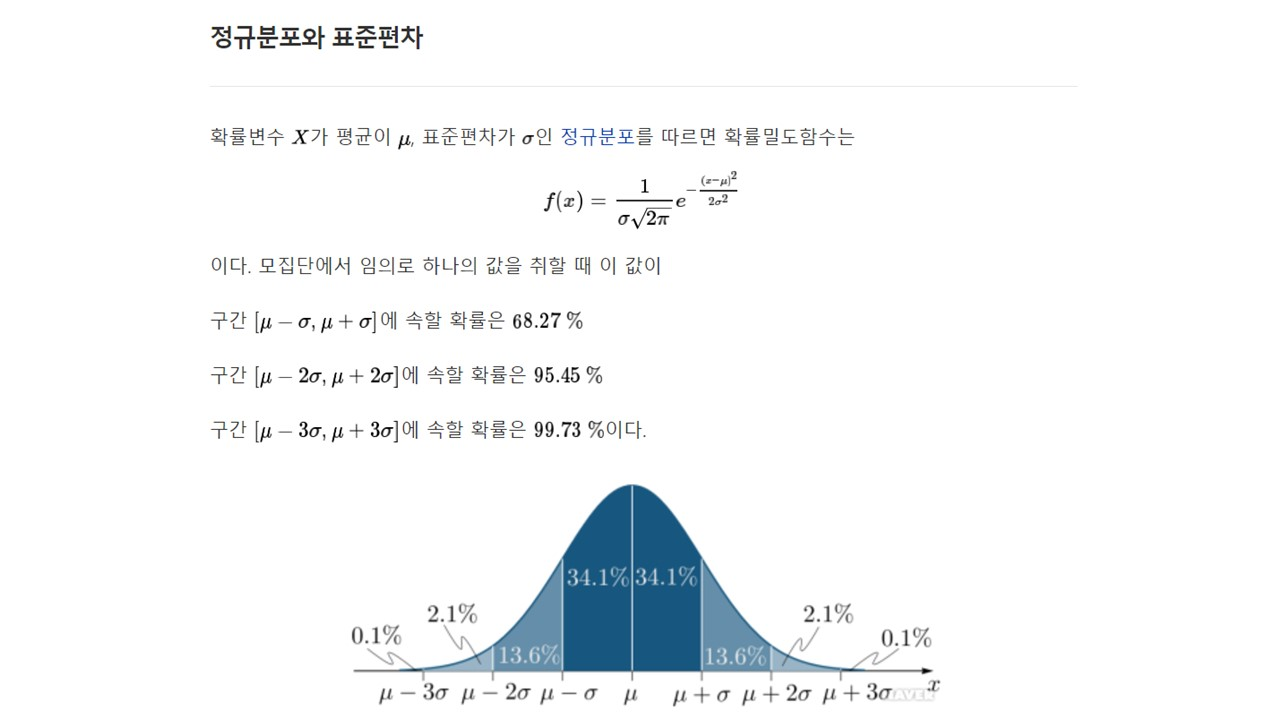

**데이터 정제_파생변수 및 변환**

**더미변수의 의미**

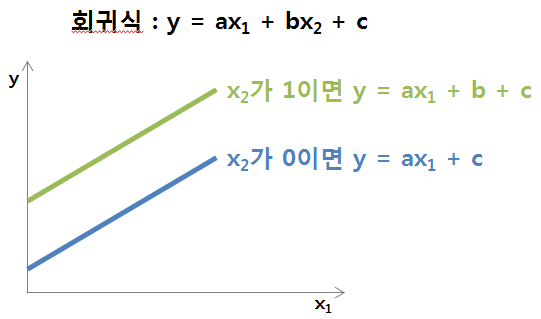

더미변수는 회귀 기울기를 바꾸지는 않고 절편만을 바꾸어 평행하게 움직이게 하는 역할을 한다

**데이터 정제_연습**

In [4]:
path = "./"

In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [3]:
import matplotlib
# 한글설치 (윈도우 버전)
matplotlib.rc('font', family="Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [7]:
df_raw = pd.read_csv(path+"health_결측.csv", encoding = "euc-kr")

In [ ]:
df_raw.isnull().sum()

In [ ]:
# 문자형 결측치 처리
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

In [ ]:
# 숫자형 결측치 처리 : groupby(범주형 변수), agg("집계함수")
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

In [ ]:
# 숫자형 결측치 처리 : transform("집계함수")
df_raw["WEIGHT"] = \
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

In [ ]:
# boxplot: 상자수염도, figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10, 4))

In [ ]:
# 조건 해당 자료 직접 확인
df_raw [(df_raw["RSTPULSE"] >= 100) ]

In [ ]:
# RSTPULSE 변수에서 이상치 제외(100 이하만 보관)
181
# RSTPULSE 변수에서 이상치 제외(100 이하만 보관)
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness

In [ ]:
# select_dtypes 조건으로 변수 유형 선택 : 숫자형 변수 선택 ("object" 제외)
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()

In [ ]:
# 문자형 변수 선택 : select_dtypes="object" 선택
df_fitness_char = df_fitness.select_dtypes(include = "object")
df_fitness_char.head()

In [ ]:
# scale변환 : 표준정규분포 기준
df_scale_std = scale(df_fitness_num)
# scale 변환하면 numpy의 행렬 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head()

In [ ]:
# scale 변환 결과 확인: 요약통계량
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

In [ ]:
# scale변환 : 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_fitness_num)
# scale 변환하면 numpy의 행렬 형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head()

In [ ]:
# scale 변환 결과 확인: 요약통계량
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

In [ ]:
# scale변환: 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)
# scale 변환하면 numpy의 행렬 형태로 저장 -> DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

In [ ]:
# scale 변환 결과 확인: 요약통계량
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

In [ ]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

In [ ]:
df_rstpulse.describe().round(3)

In [ ]:
# pandas의 DataFrame.hist 이용(figsize = (x축 크기, y축 크기)
df_rstpulse.hist(figsize = (10,5))